In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import f_oneway
from xgboost import XGBClassifier, DMatrix
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
data.head(10)

gender     race parental level of education         lunch  \
0  female  group B           bachelor's degree      standard   
1  female  group C                some college      standard   
2  female  group B             master's degree      standard   
3    male  group A          associate's degree  free/reduced   
4    male  group C                some college      standard   
5  female  group B          associate's degree      standard   
6  female  group B                some college      standard   
7    male  group B                some college  free/reduced   
8    male  group D                 high school  free/reduced   
9  female  group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
5                    none          71             83             78  
6               completed          88             95             92  
7                    none          40             43             39  
8               completed          64             64             67  
9                    none          38             60             50

In [3]:
print(data['gender'])

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object


In [4]:
duplicates = data.duplicated()
data[duplicates]

Empty DataFrame
Columns: [gender, race, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []

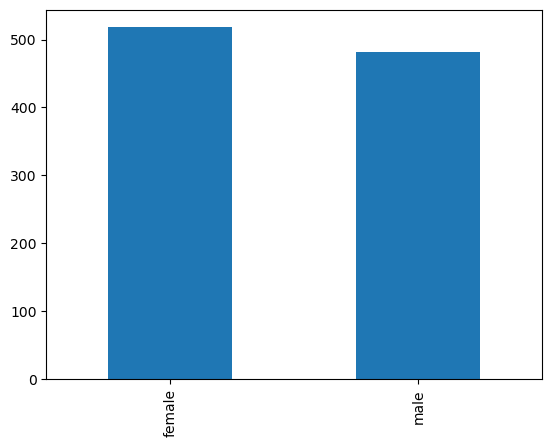

In [5]:
data['gender'].value_counts().plot(kind='bar')
plt.show()

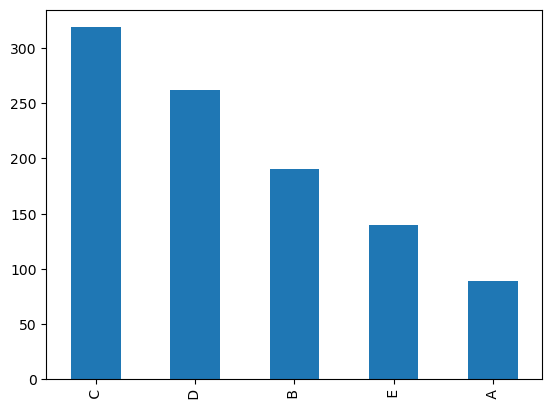

In [6]:
data['race'] = data['race'].str.replace('group', '')
data['race'].value_counts().plot(kind='bar')
plt.show()

In [7]:
data['race'] = data['race'].astype('category')
data['parental level of education'] = data['parental level of education'].astype('category')
data['test preparation course']=data['test preparation course'].map({'none': 0, 'completed': 1})
data['test preparation course']=data['test preparation course'].astype('boolean')
data.dtypes

gender                           object
race                           category
parental level of education    category
lunch                            object
test preparation course         boolean
math score                        int64
reading score                     int64
writing score                     int64
dtype: object

In [8]:
data.reset_index(inplace=True)
data = data.rename(columns = {'index' : 'id'})
print(data)

      id  gender race parental level of education         lunch  \
0      0  female    B           bachelor's degree      standard   
1      1  female    C                some college      standard   
2      2  female    B             master's degree      standard   
3      3    male    A          associate's degree  free/reduced   
4      4    male    C                some college      standard   
..   ...     ...  ...                         ...           ...   
995  995  female    E             master's degree      standard   
996  996    male    C                 high school  free/reduced   
997  997  female    C                 high school  free/reduced   
998  998  female    D                some college      standard   
999  999  female    D                some college  free/reduced   

     test preparation course  math score  reading score  writing score  
0                      False          72             72             74  
1                       True          69         

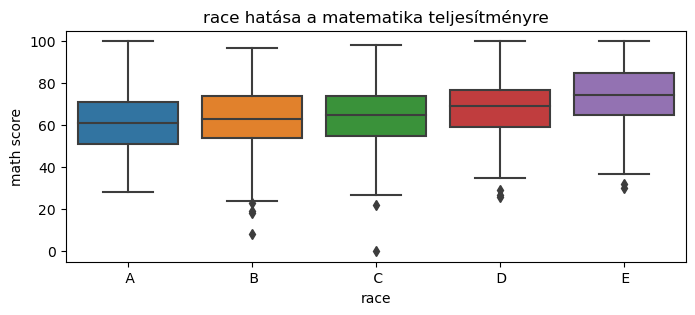

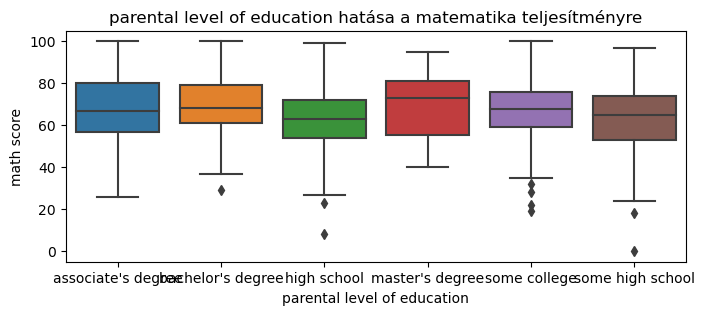

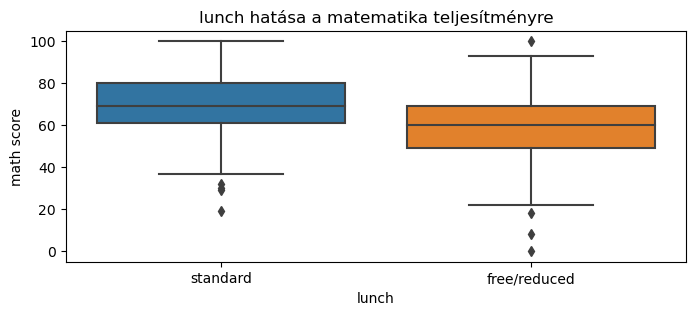

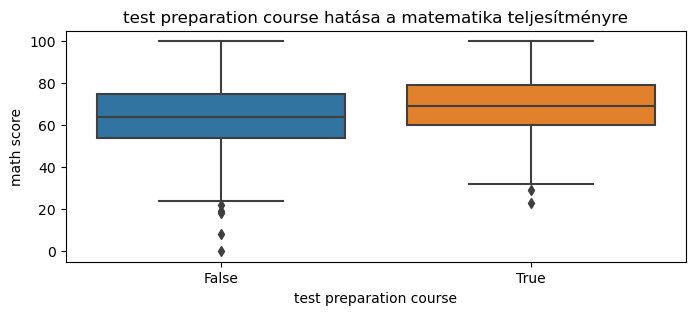

In [9]:
# Kategorikus oszlopok kiválasztása
categorical_cols = ['race', 'parental level of education', 'lunch', 'test preparation course']

# Boxplotok létrehozása
for col in categorical_cols:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=col, y='math score', data=data)
    plt.title(f'{col} hatása a matematika teljesítményre')
    plt.show()


In [10]:
# Példa az ANOVA tesztre
for col in categorical_cols:
    groups = data.groupby(col)['math score'].apply(list)
    result = f_oneway(*groups)
    print(f'ANOVA teszt eredménye {col}: {result}')

ANOVA teszt eredménye race: F_onewayResult(statistic=14.593885166332635, pvalue=1.3732194030370688e-11)
ANOVA teszt eredménye parental level of education: F_onewayResult(statistic=6.521582600453218, pvalue=5.592272384107223e-06)
ANOVA teszt eredménye lunch: F_onewayResult(statistic=140.1188415483512, pvalue=2.4131955993147374e-30)
ANOVA teszt eredménye test preparation course: F_onewayResult(statistic=32.54264846908886, pvalue=1.5359134607155386e-08)


In [11]:
#     Race:
#         F-érték: 14.59
#         p-érték: kb. 1.37e-11 (nagyon kicsi)
#         Az eredmények szignifikánsak, így a "race" változó jelentős hatással van a matematika teljesítményre.

#     Parental Level of Education:
#         A statisztikai teszt eredménye hiányzik (NaN). Ez lehet a hiányzó adatok vagy az alacsony változatosság miatt.

#     Lunch:
#         F-érték: 140.12
#         p-érték: kb. 2.41e-30 (nagyon kicsi)
#         Az eredmények szignifikánsak, így a "lunch" változó jelentős hatással van a matematika teljesítményre.

#     Test Preparation Course:
#         F-érték: 32.54
#         p-érték: kb. 1.54e-08 (nagyon kicsi)
#         Az eredmények szignifikánsak, így a "test preparation course" változó jelentős hatással van a matematika teljesítményre.

In [12]:
labelencoder = LabelEncoder()
X = data[['parental level of education','reading score']]
X['parental level of education'] = labelencoder.fit_transform(X['parental level of education'])
y = data['writing score']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, train_size=0.7)
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
y_pred = model_LR.predict(X_test)

C:\Users\szila\AppData\Local\Temp\ipykernel_16256\695231311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['parental level of education'] = labelencoder.fit_transform(X['parental level of education'])


In [13]:
r2_score(y_test, y_pred)

0.9171980175996257

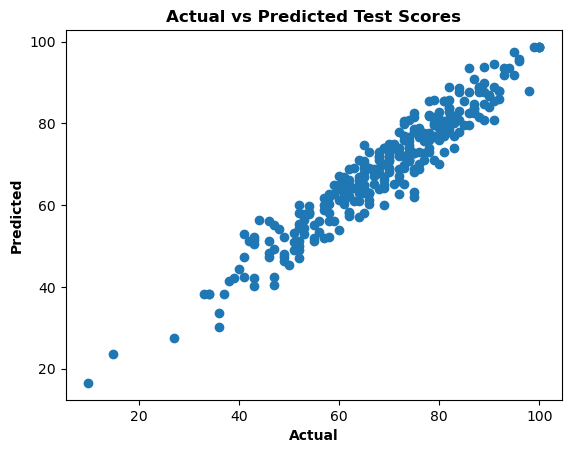

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual', fontweight='bold')
plt.ylabel('Predicted', fontweight = 'bold')
plt.title('Actual vs Predicted Test Scores', fontweight='heavy')

plt.show()

C:\Users\szila\AppData\Local\Temp\ipykernel_16256\2119928611.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(dataToHeatMap.corr())
C:\Users\szila\AppData\Local\Temp\ipykernel_16256\2119928611.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataToHeatMap.corr(), annot=True, fmt=".2f",mask=mask)


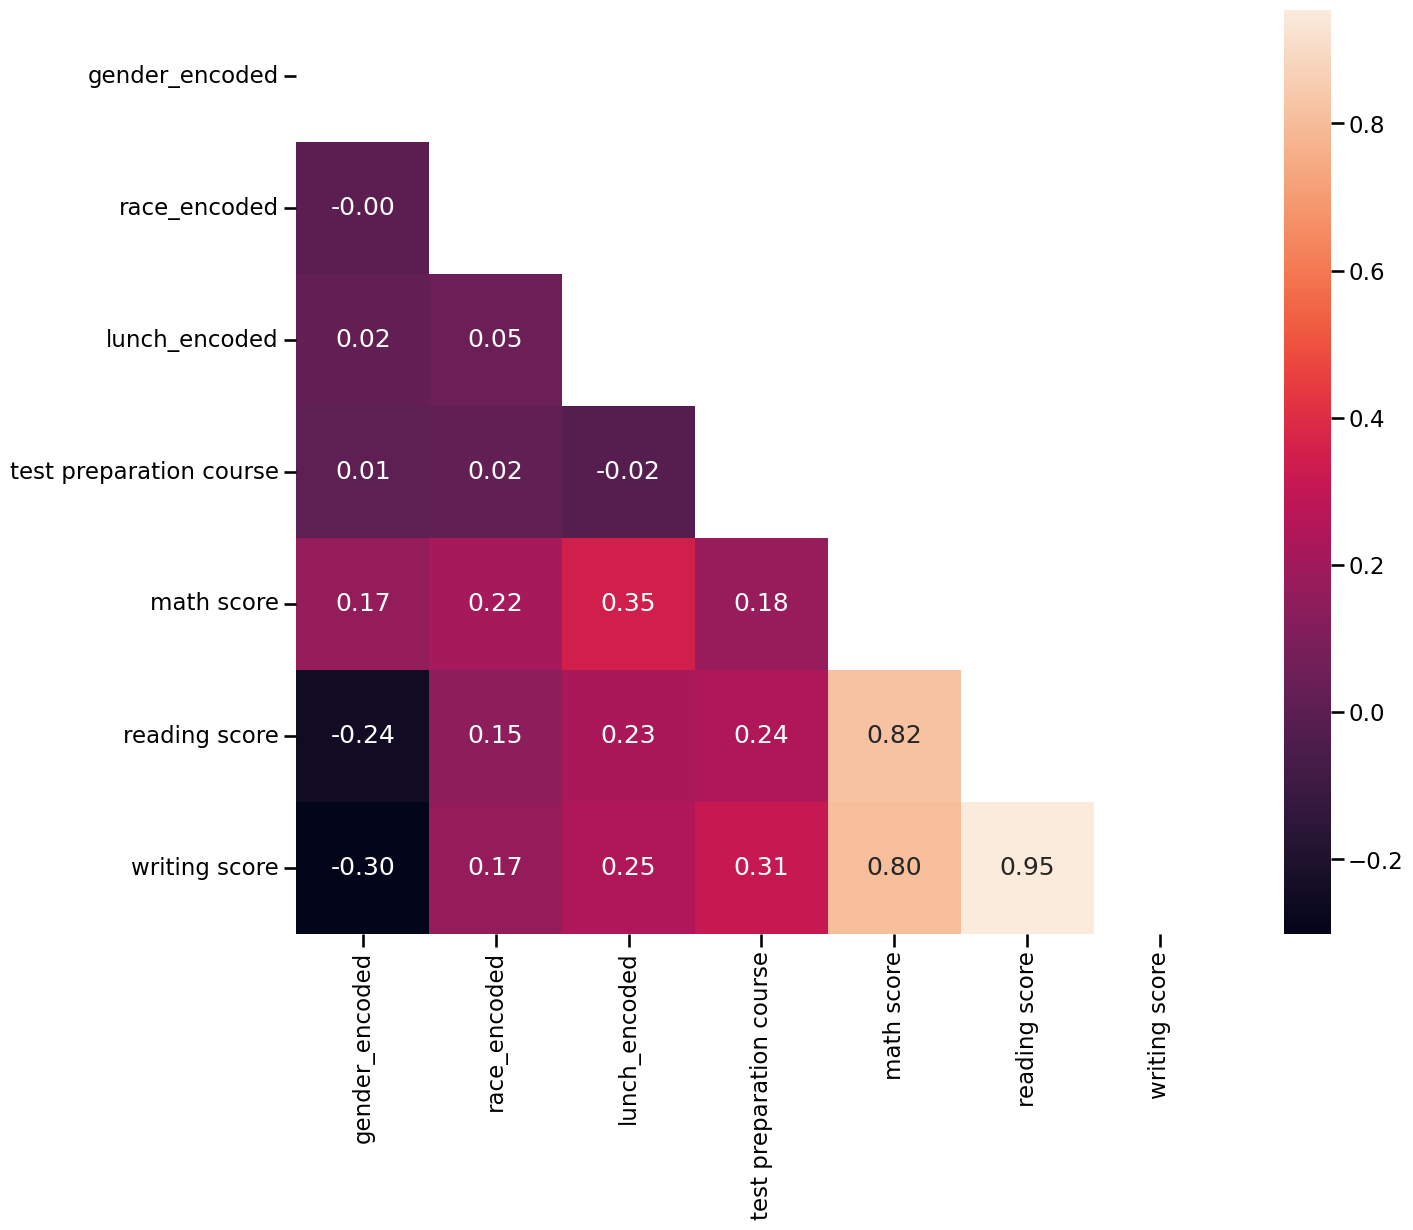

In [15]:
data['gender_encoded'] = labelencoder.fit_transform(data['gender'])
data['race_encoded'] = labelencoder.fit_transform(data['race'])
data['lunch_encoded'] = labelencoder.fit_transform(data['lunch'])
dataToHeatMap = data[['gender_encoded','race_encoded', 'parental level of education', 'lunch_encoded', 'test preparation course','math score','reading score', 'writing score']]
sns.set_context("talk")
plt.figure(figsize=(15, 12))
mask = np.triu(dataToHeatMap.corr())
sns.heatmap(dataToHeatMap.corr(), annot=True, fmt=".2f",mask=mask)
plt.show()

In [27]:
data['gender']

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object

In [40]:
categorical_columns = ['gender', 'race', 'parental level of education', 'lunch', 'test preparation course']
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Splitting data into features (X) and target variable (y)
X = data.drop(['math score', 'reading score', 'writing score'], axis=1)
y = data[['math score', 'reading score', 'writing score']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data into DMatrix format
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Define and train the XGBoost model
xgb = XGBClassifier(objective="binary:logistic", eval_metric="auc", max_depth=1,
                    n_estimators=500,learning_rate=0.05,colsample_bytree=0.35,subsample=0.5)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)


xgb_prob = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, xgb_prob)
sns.set_style("darkgrid")
sns.set_context("poster")
plt.figure(figsize=(15, 10))
plt.plot([0, 1], [0, 1], 'k--')
sns.lineplot(fpr, tpr, alpha=0.6, ci=None)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(["Baseline", "xGBoosting"])
plt.show()
print(roc_auc_score(y_test, xgb_prob))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80], got [  8  15  18  22  23  24  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100]